# Overview:

This is the first part of my project where my ultimate aim is to show the data quality issues present on the Doctor Rating website [Ratemds](https://www.ratemds.com). In order to show the data quality issues we first need the 'DATA' and in this case the only way to get the data is to scrape it from the website.

### What is Web-Scraping?
It is a tool for turning the unstructured data on the web into machine readable, structured data which is ready for analysis. [source](https://www.promptcloud.com/blog/should-data-scientists-learn-web-scraping)

### What are we going to scrape from the website?
#### Below are doctor details that we would be scraping from the website:
1. Name of the Doctor
2. Specialty
3. Star-Rating
4. No. of Reviews
5. Reviews

#### So, lets begin!

#### 1. Importing required Libraries

I'll be using the below libraries to scrape the data from the website:<br>
<br>
[requests](http://docs.python-requests.org/en/master/) - used for requesting the content of the webpage.<br>
[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) - A very popular python library that we'll use to parse the data from HTML files.<br>
[selenium](https://selenium-python.readthedocs.io/installation.html) - used to automate the process of accessing web browser via Python<br>
[sleep](https://www.pythoncentral.io/pythons-time-sleep-pause-wait-sleep-stop-your-code/) - this is function from time module which I will use to control the crawling rate in order to prevent bombarding the server with large number of requests per second. (Caution: Hammering the server with huge no. of requests may lead to blocking of our IP Address)<br>
[pandas](https://pandas.pydata.org/) - used to store the scraped data and perform further analysis.

In [3]:
#Import Webscraping libraries
from bs4 import BeautifulSoup
from requests import get
from selenium import webdriver

#Import Data structure libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#Import libraries for controlling crawling rate
from time import sleep, time
from random import randint

from IPython.display import Image

#### 2. Create an empty dataframe that will be used to store the scraped data

In [106]:
#Create an empty data frame where we will store our scraped data
df=pd.DataFrame(columns=['Doctor Name','Specialty','Overall Rating','No. of Reviews','Reviews', 'Review Rating'])
df

,Doctor Name,Specialty,Overall Rating,No. of Reviews,Reviews,Review Rating


#### Checking out the website to be scraped

We would be scrapping the details of all the best doctors who reside in Buffalo as an example here. Let's get the url for this:<br>
https://www.ratemds.com/best-doctors/ny/buffalo/family-gp/?page=<br>

Let's check the format in which details of the doctors are listed:

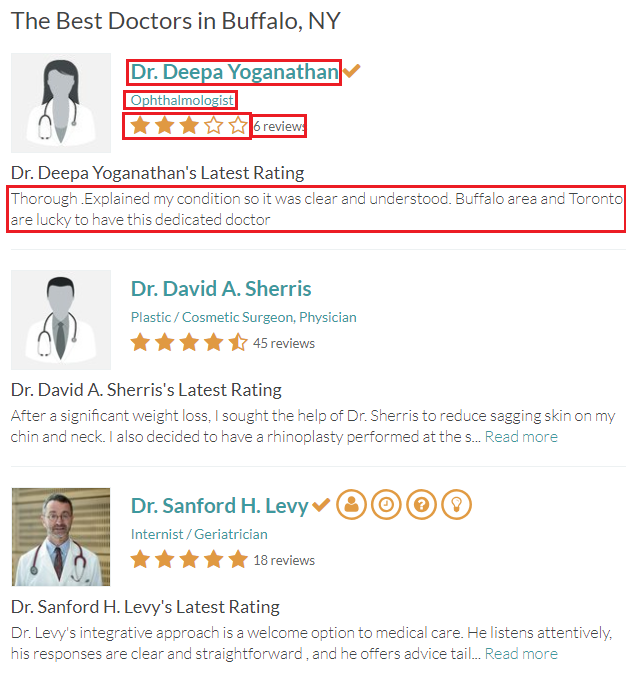

In [6]:
Image(filename="img/Drsdetails.png", width=550, height=350)

But, there is one problem, we can see only one review for each doctor though the number of reviews is more than one. We need to click on the name of the doctor to see the reviews along with rest of the details as shown below:

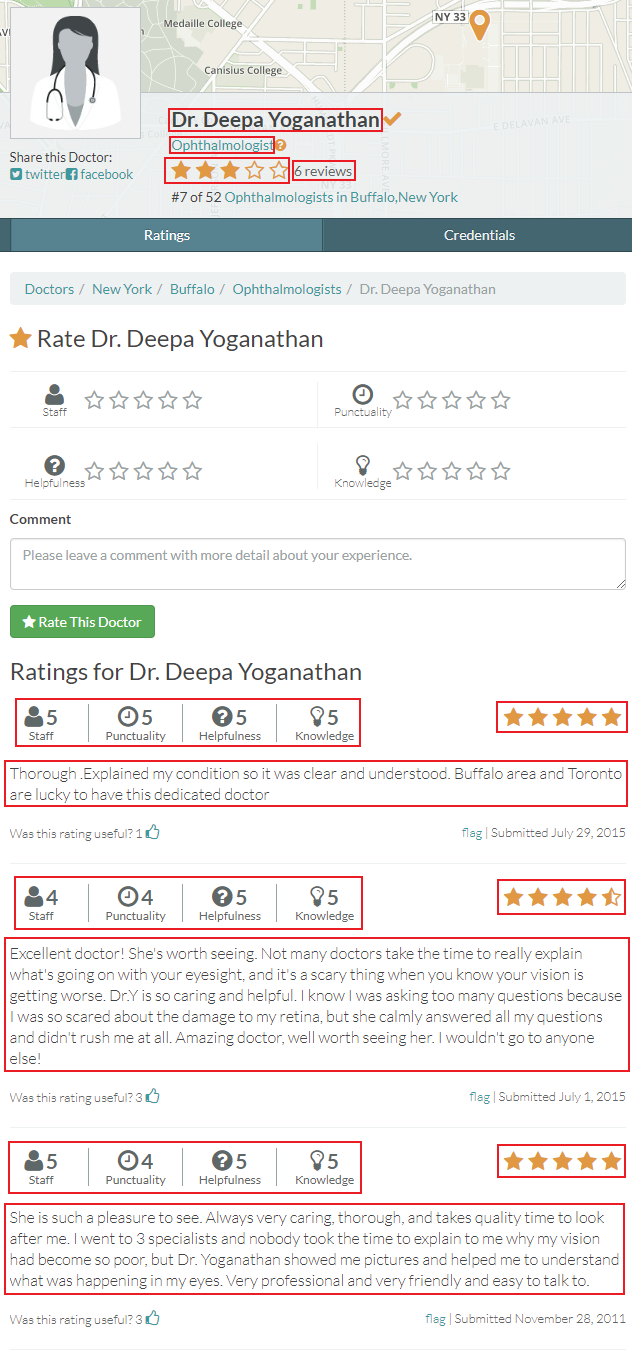

In [4]:
Image(filename="img/Drsdetailswithreviews.png", width=550, height=350)

This means that we need to click on each Doctor's Name before we scrape the data. We can do this with the help of Selenium. Selenium is a module in python that automates the web browser interaction with the help of a python script.<br>

So, the selenium module will make the web browser click automatically on each of the doctor to go to the page where all their details are present, scrape the required data from there using modules like requests and BeautifulSoup, and then go back to the main page and then click on next doctor and so on.

#### 3. Enter the URL of the page to be scraped

**Note**: While entering the link, make sure that we exclude the page number from the link. This is because we'll be 
adding it as a variable in the next step, so that we can scrape multiple pages. So, the URL that the user would provide would be: https://www.ratemds.com/best-doctors/ny/buffalo/family-gp/?page=

In [4]:
user_url=input('Please enter the URL of the page you want to scrape: ')

Please enter the URL of the page you want to scrape: https://www.ratemds.com/best-doctors/ny/buffalo/family-gp/?page=


#### 3. Set the no. of pages to be scraped
Another thing we need to consider is how many pages do we need to scrape. Its not always necessary to scrape all the data present on the website and that's why I made it a user input.

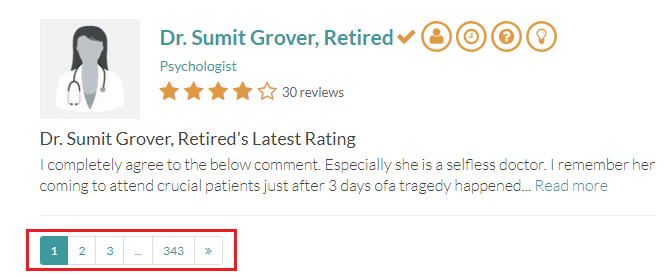

In [6]:
Image(filename='img/pages.png', width=550, height=350)

In [5]:
#Set the no. of pages you want to scrape
n_pages=input('How many pages do you want to Scrape? ')
pages=np.arange(1,int(n_pages)+1)

How many pages do you want to Scrape? 1


#### 4. The actual code
I'll explain the code in bits and pieces for the first doctor on the first page of the website which can be later looped in for scraping more than one doctors and pages. The entire code with the required loops is provided at the end.<br>

1. URL of the first page<br>
I concatenated the user_url and the n_pages input provided by the user to get the link of the first page of URL.

In [77]:
url=user_url+str(page)
url

'https://www.ratemds.com/best-doctors/ny/buffalo/family-gp/?page=1'

2. Launch a script controlled browser session<br>
Here, the selenium with the help of webdriver starts a browser session (in my case, its chrome).

In [80]:
driver=webdriver.Chrome()
driver.implicitly_wait(30)
driver.get(url)

3. Get the contents of the URL using requests and Beautiful Soup

In [107]:
r=get(url)
soup1=BeautifulSoup(r.content,'lxml')

4. Extract the name of the doctor from 'soup1'.

In [108]:
dr_name=soup1.find('a',{'class':'search-item-doctor-link'})
name=dr_name.text
name

'Dr. Jean M. Cange'

5. Make selenium click on the name of the Doctor in the website

In [109]:
python_button=driver.find_element_by_link_text(name)
python_button.click()

6. Get the contents of the current page

In [110]:
soup=BeautifulSoup(driver.page_source,'lxml')

7. Extract the required details of doctor from the link based on their HTML tags, classes and attributes

In [111]:
#1. Doctor Name
doctor_name=soup.find('h1',{'itemprop':'name'})

#2. Specialty
specialty=soup.find('div',{'class':'search-item-info'})

#3. Star_Rating
star_rating=soup.find('span',{'class':'star-rating'})

#4. No. of Reviews
no_of_reviews=soup.find('span',{'itemprop':'ratingCount'})

#5. Using a loop extract each of the reviews and its respective review ratings present on the first page
for k in range(len(soup4)):
    reviews=soup4[k].find('p',{'itemprop':'reviewBody'})
    review_rating=soup4[k].find('span',{'class':'star-rating'})

    #Append the extracted data row-wise into table
    df=df.append(pd.Series([doctor_name.text,specialty.text,star_rating['title'],no_of_reviews.text,reviews.text,review_rating['title']],index=df.columns), ignore_index=True)

#If there are more than one page of reviews, we need to click on the next page no. which is done as shown below:

#Get the page numbers from the page
soup2=soup.find('ul',{'class':'pagination pagination-sm'})
soup3=soup2.findAll('a')

#Use a loop to click on each page
for l in range(2,len(soup3)):
    python_button=driver.find_element_by_link_text(str(l))
    python_button.click()
    sleep(randint(5,9))
    
    #Get the html content on each page
    soup5=BeautifulSoup(driver.page_source,'lxml')
    soup6=soup5.findAll('div',{'class':'rating'})
    
    #Extract every review and review rating for the doctor
    for m in range(len(soup6)):
        reviews=soup6[m].find('p',{'itemprop':'reviewBody'})
        review_rating=soup6[m].find('span',{'class':'star-rating'})
        
        #Append the extracted data into the table
        df=df.append(pd.Series([doctor_name.text,specialty.text,star_rating['title'],no_of_reviews.text,reviews.text,review_rating['title']],index=df.columns), ignore_index=True)
        
#     driver.execute_script("window.history.go(-1)")

Let's view the extracted data now:

In [112]:
df

,Doctor Name,Specialty,Overall Rating,No. of Reviews,Reviews,Review Rating
0,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,Dr. Cangé is by far the best doctor I've had. ...,4.50
1,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,Best Doctor in Buffalo. We couldn’t be happie...,5.00
2,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,"Best Doctor EVER! He is thorough, professiona...",5.00
3,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,"Kind, Caring and professional Doctor. He is ...",5.00
4,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,Very happy with Dr. Cangé. He is a wonderful...,5.00
5,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,I went to this dr for a second opinion. He see...,1.25
6,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,Dr. Cangé is a very professional and knowledge...,5.00
7,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,"The best! A professional, caring, thorough Do...",5.00
8,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,"Very professional, caring and thorough. He ta...",5.00
9,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,"Professional, knowledgeable, caring and takes ...",5.00


So, we scraped the data for Dr. Jean M. Cange with all reviews for him and the respective review ratings.

### Complete Code

Provide the user URL (For eg. https://www.ratemds.com/best-doctors/ny/buffalo/family-gp/?page=)

In [123]:
user_url='https://www.ratemds.com/best-doctors/ny/buffalo/family-gp/?page='

Provide the number of pages to be scraped:

In [126]:
user_pages=2
pages=np.arange(1,int(user_pages)+1)

Create the table where the data needs to be stored:

In [131]:
df=pd.DataFrame(columns=['Doctor Name','Specialty','Overall Rating','No. of Reviews','Reviews', 'Review Rating'])
df

,Doctor Name,Specialty,Overall Rating,No. of Reviews,Reviews,Review Rating


The main code:

In [132]:
for page in pages:

    url=user_url+str(page)
    
    #Launch a Chrome Session
    driver=webdriver.Chrome()
    driver.implicitly_wait(30)
    driver.get(url)
    
    r=get(url)
    soup1=BeautifulSoup(r.content,'lxml')
        
    for i in soup1.findAll('a',{'class':'search-item-doctor-link'}):
        name=i.text

        python_button=driver.find_element_by_link_text(name)
        python_button.click()
    
        sleep(randint(5,9))
    
        soup=BeautifulSoup(driver.page_source,'lxml')
    
        doctor_name=soup.find('h1',{'itemprop':'name'})
    
        specialty=soup.find('div',{'class':'search-item-info'})
    
        star_rating=soup.find('span',{'class':'star-rating'})
        
        no_of_reviews=soup.find('span',{'itemprop':'ratingCount'})
        
        soup4=soup.findAll('div',{'class':'rating'})
        
        for k in range(len(soup4)):
            reviews=soup4[k].find('p',{'itemprop':'reviewBody'})
            review_rating=soup4[k].find('span',{'class':'star-rating'})
            
            df=df.append(pd.Series([doctor_name.text,specialty.text,star_rating['title'],no_of_reviews.text,reviews.text,review_rating['title']],index=df.columns), ignore_index=True)
        
        soup2=soup.find('ul',{'class':'pagination pagination-sm'})
        soup3=soup2.findAll('a')
        
        for l in range(2,len(soup3)):
            python_button=driver.find_element_by_link_text(str(l))
            python_button.click()
            sleep(randint(5,9))
            
            soup5=BeautifulSoup(driver.page_source,'lxml')
            soup6=soup5.findAll('div',{'class':'rating'})
            
            for k in range(len(soup6)):
                reviews=soup6[k].find('p',{'itemprop':'reviewBody'})
                review_rating=soup6[k].find('span',{'class':'star-rating'})
                   
                df=df.append(pd.Series([doctor_name.text,specialty.text,star_rating['title'],no_of_reviews.text,reviews.text,review_rating['title']],index=df.columns), ignore_index=True)
            driver.execute_script("window.history.go(-1)")   
        #Go back to the previous page          
        driver.execute_script("window.history.go(-1)")
driver.quit()

In [133]:
df

,Doctor Name,Specialty,Overall Rating,No. of Reviews,Reviews,Review Rating
0,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,Dr. Cangé is by far the best doctor I've had. ...,4.50
1,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,Best Doctor in Buffalo. We couldn’t be happie...,5.00
2,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,"Best Doctor EVER! He is thorough, professiona...",5.00
3,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,"Kind, Caring and professional Doctor. He is ...",5.00
4,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,Very happy with Dr. Cangé. He is a wonderful...,5.00
5,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,I went to this dr for a second opinion. He see...,1.25
6,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,Dr. Cangé is a very professional and knowledge...,5.00
7,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,"The best! A professional, caring, thorough Do...",5.00
8,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,"Very professional, caring and thorough. He ta...",5.00
9,Dr. Jean M. Cange,Family Doctor / G.P.,4.63,23,"Professional, knowledgeable, caring and takes ...",5.00


Finally, we will save this scrape data to an Excel file.

In [4]:
df.to_csv('Ratemds-Family Dr-G.Ps.csv')

NameError: name 'df' is not defined